In [1]:
%matplotlib inline

# import dependencies
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import pymongo
import matplotlib.pyplot as plt

In [2]:
#set the url as a variable
url = 'https://www.the-numbers.com/weekly-box-office-chart'

In [3]:
#make a call to the internet page
response = requests.get(url)

#parse the text version of the response using an html parser 
soup = bs(response.text, 'html.parser')

#pretty print the parsed text
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <!-- Global site tag (gtag.js) - Google Analytics -->
  <script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-1343128-1">
  </script>
  <script>
   window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-1343128-1');
  </script>
  <meta content='(PICS-1.1 "https://www.icra.org/ratingsv02.html" l gen true for "https://www.the-numbers.com/" r (cb 1 lz 1 nz 1 oz 1 vz 1) "https://www.rsac.org/ratingsv01.html" l gen true for "https://www.the-numbers.com/" r (n 0 s 0 v 0 l 0))' http-equiv="PICS-Label"/>
  <!--<meta http-equiv="Content-Type" content="text/html; charset=ISO-8859-1" >-->
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="telephone=no" name="format-detection"/>
  <!-- for apple mobile -->
  <meta content="521546213" property="fb:admins">
   <meta content="initial-scale=1" name="viewport"/>
   <meta content="Weekly (

In [4]:
#finds the table in the HTML page
all_table_data = soup.find_all('table')

#finds and isolates only the <tr> tags and subtags within the above table
rows = soup.find_all('tr')

#start an empty master list of rows
data = []

#loop through each row
for row in rows:
    #each cell is a column within that row, so you use <td> to find each cell
    cols = row.find_all('td')
    #add the cells to a preliminary list using list comprehensions (this is is for a single row)
    cols = [element.text.strip() for element in cols]
    #add that preliminary list to the master list of rows
    data.append([element for element in cols])

In [5]:
df = pd.DataFrame(data)
df.head()

,0,1,2,3,4,5,6,7,8,9
0,← Previous Chart,Chart Index,,None,None,None,None,None,None,None
1,None,None,None,None,None,None,None,None,None,None
2,1,new,Captain Marvel,Walt Disney,"$196,895,933",,"4,310","$45,684","$196,895,933",1
3,2,(1),How to Train Your Dragon: T…,Universal,"$21,332,970",-43%,"4,042","$5,278","$126,299,095",3
4,3,(2),Tyler Perryâs A Madea Fam…,Lionsgate,"$17,153,205",-49%,"2,442","$7,024","$50,983,015",2


In [6]:
# drop first two rows
df.drop([0,1], inplace=True)

In [7]:
df.columns = ["Rank", "Last Rank", "Movie", "Distributor", "Gross", "Change", "Theatres", "Per Theatre", "Total Gross", "Week"]

In [8]:
df.head()

,Rank,Last Rank,Movie,Distributor,Gross,Change,Theatres,Per Theatre,Total Gross,Week
2,1,new,Captain Marvel,Walt Disney,"$196,895,933",,"4,310","$45,684","$196,895,933",1
3,2,(1),How to Train Your Dragon: T…,Universal,"$21,332,970",-43%,"4,042","$5,278","$126,299,095",3
4,3,(2),Tyler Perryâs A Madea Fam…,Lionsgate,"$17,153,205",-49%,"2,442","$7,024","$50,983,015",2
5,4,(4),The LEGO Movie 2: The Secon…,Warner Bros.,"$5,899,752",-28%,"2,930","$2,014","$99,184,713",5
6,5,(3),Alita: Battle Angel,20th Century Fox,"$4,775,475",-52%,"2,374","$2,012","$79,921,539",5


In [9]:
# Make a copy of dataframe
new_df = df.copy()

# remove all dollar signs
new_df['Gross'] = [x.strip('$') for x in df['Gross']]
new_df['Per Theatre'] = [x.strip('$') for x in df['Per Theatre']]
new_df['Total Gross'] = [x.strip('$') for x in df['Total Gross']]

new_df.head()

,Rank,Last Rank,Movie,Distributor,Gross,Change,Theatres,Per Theatre,Total Gross,Week
2,1,new,Captain Marvel,Walt Disney,"196,895,933",,"4,310","45,684","196,895,933",1
3,2,(1),How to Train Your Dragon: T…,Universal,"21,332,970",-43%,"4,042","5,278","126,299,095",3
4,3,(2),Tyler Perryâs A Madea Fam…,Lionsgate,"17,153,205",-49%,"2,442","7,024","50,983,015",2
5,4,(4),The LEGO Movie 2: The Secon…,Warner Bros.,"5,899,752",-28%,"2,930","2,014","99,184,713",5
6,5,(3),Alita: Battle Angel,20th Century Fox,"4,775,475",-52%,"2,374","2,012","79,921,539",5


In [10]:
# remove all commas and create new clean dataframe
new_df['Gross'] = new_df['Gross'].str.replace(',', '')
new_df['Theatres'] = new_df['Theatres'].str.replace(',', '')
new_df['Total Gross'] = new_df['Total Gross'].str.replace(',', '')
new_df.head()

,Rank,Last Rank,Movie,Distributor,Gross,Change,Theatres,Per Theatre,Total Gross,Week
2,1,new,Captain Marvel,Walt Disney,196895933,,4310,"45,684",196895933,1
3,2,(1),How to Train Your Dragon: T…,Universal,21332970,-43%,4042,"5,278",126299095,3
4,3,(2),Tyler Perryâs A Madea Fam…,Lionsgate,17153205,-49%,2442,"7,024",50983015,2
5,4,(4),The LEGO Movie 2: The Secon…,Warner Bros.,5899752,-28%,2930,"2,014",99184713,5
6,5,(3),Alita: Battle Angel,20th Century Fox,4775475,-52%,2374,"2,012",79921539,5


In [11]:
# create new dataframe isolating movie, distributor, total gross revenue
movie_gross_df = new_df[["Movie", "Distributor", "Total Gross"]]
movie_gross_df.head()

,Movie,Distributor,Total Gross
2,Captain Marvel,Walt Disney,196895933
3,How to Train Your Dragon: T…,Universal,126299095
4,Tyler Perryâs A Madea Fam…,Lionsgate,50983015
5,The LEGO Movie 2: The Secon…,Warner Bros.,99184713
6,Alita: Battle Angel,20th Century Fox,79921539


In [12]:
dist_gross_count = movie_gross_df.groupby("Distributor").count()["Total Gross"]
dist_gross_count.head()

Distributor
20th Century Fox      3
A24                   2
Abramorama Films      1
Amazon Studios        1
Annapurna Pictures    3
Name: Total Gross, dtype: int64

In [13]:
dist_gross_sum = movie_gross_df.groupby("Distributor").sum()["Total Gross"]
dist_gross_sum.head()

Distributor
20th Century Fox      7992153921544683616742726
A24                                189555341431
Abramorama Films                         110006
Amazon Studios                          4506504
Annapurna Pictures      14804245477625061528682
Name: Total Gross, dtype: object

In [14]:
# calculate averages to obtain average revenue per movie for each distributor

In [15]:
# combine the data into a single dataset using pandas merge
merged_df = pd.DataFrame(
    data={"Total Gross All Movies": dist_gross_sum,
          "# of Movies": dist_gross_count,
    }
)
merged_df.head()

,Total Gross All Movies,# of Movies
Distributor,,
20th Century Fox,7992153921544683616742726,3
A24,189555341431,2
Abramorama Films,110006,1
Amazon Studios,4506504,1
Annapurna Pictures,14804245477625061528682,3


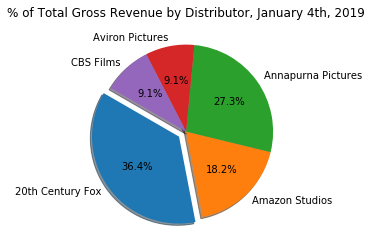

In [16]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise
labels = '20th Century Fox', 'Amazon Studios', 'Annapurna Pictures', 'Aviron Pictures', 'CBS Films'
sizes = [4, 2, 3, 1, 1]
explode = (0.1, 0, 0, 0, 0)  # only "explode" the 1st slice (i.e. '20th Century Fox')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        explode=explode, shadow=True, startangle=150)

plt.title("% of Total Gross Revenue by Distributor, January 4th, 2019")

# Save Figure
plt.savefig('fig1.png')

plt.show()

In [17]:
twentieth_c_fox = new_df[new_df["Distributor"] == "20th Century Fox"]
twentieth_c_fox

,Rank,Last Rank,Movie,Distributor,Gross,Change,Theatres,Per Theatre,Total Gross,Week
6,5,(3),Alita: Battle Angel,20th Century Fox,4775475,-52%,2374,"2,012",79921539,5
21,-,(17),Bohemian Rhapsody,20th Century Fox,588800,-57%,386,"1,525",215446836,19
45,-,(44),The Kid Who Would Be King,20th Century Fox,64417,-8%,95,678,16742726,7


In [18]:
twentieth_c_fox["Movie"]

6           Alita: Battle Angel
21            Bohemian Rhapsody
45    The Kid Who Would Be King
Name: Movie, dtype: object

In [19]:
twentieth_c_fox["Total Gross"]

6      79921539
21    215446836
45     16742726
Name: Total Gross, dtype: object

In [20]:
# isolated dataset for twentieth century fox releases
movies = ["Bohemian Rhapsody", "Widows", "Once Upon a Deadpool", "The Hate U Give"]
total_gross = [195296306, 42162140, 324574517, 29705000] 

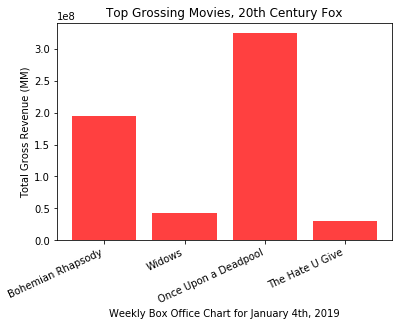

In [21]:
x_axis = np.arange(0, len(movies))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("Top Grossing Movies, 20th Century Fox")
plt.xlabel("Weekly Box Office Chart for January 4th, 2019")
plt.ylabel("Total Gross Revenue (MM)")

plt.bar(x_axis, total_gross, facecolor="red", alpha=0.75, align="center")
plt.xticks(tick_locations, movies,  ha='right', rotation=25)

# Save Figure
plt.savefig('fig2.png')

plt.show()

In [42]:
# working in mongodb:
# establish mongodb location
conn = "mongodb://localhost:27017"

# collect to mongodb database
client = pymongo.MongoClient(conn)

In [36]:
# establish database name
db = client.moviesdb

In [37]:
# establish collection
movies = db.movies

In [38]:
# call the 'to_dict' function on the new_df dataframe 
# pass the argument'records' to translate each row of the df into a dictionary
data = new_df.to_dict("records")

In [39]:
data

[{'Rank': '1',
  'Last Rank': 'new',
  'Movie': 'Captain Marvel',
  'Distributor': 'Walt Disney',
  'Gross': '196895933',
  'Change': '',
  'Theatres': '4310',
  'Per Theatre': '45,684',
  'Total Gross': '196895933',
  'Week': '1'},
 {'Rank': '2',
  'Last Rank': '(1)',
  'Movie': 'How to Train Your Dragon: T…',
  'Distributor': 'Universal',
  'Gross': '21332970',
  'Change': '-43%',
  'Theatres': '4042',
  'Per Theatre': '5,278',
  'Total Gross': '126299095',
  'Week': '3'},
 {'Rank': '3',
  'Last Rank': '(2)',
  'Movie': 'Tyler Perryâ\x80\x99s A Madea Fam…',
  'Distributor': 'Lionsgate',
  'Gross': '17153205',
  'Change': '-49%',
  'Theatres': '2442',
  'Per Theatre': '7,024',
  'Total Gross': '50983015',
  'Week': '2'},
 {'Rank': '4',
  'Last Rank': '(4)',
  'Movie': 'The LEGO Movie 2: The Secon…',
  'Distributor': 'Warner Bros.',
  'Gross': '5899752',
  'Change': '-28%',
  'Theatres': '2930',
  'Per Theatre': '2,014',
  'Total Gross': '99184713',
  'Week': '5'},
 {'Rank': '5',
  'La

In [40]:
# insert list into mongodb
movies.insert_many(data)

In [41]:
# try to find data in database
movies.find()

In [43]:
movies

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'moviesdb'), 'movies')

In [44]:
# try to find data in database to verify it is there
list(movies.find())

[{'_id': ObjectId('5c3fb58cb235de3b26beba8b'),
  'Rank': '1',
  'Last Rank': '(1)',
  'Movie': 'Aquaman',
  'Distributor': 'Warner Bros.',
  'Gross': '$41,575,901',
  'Change': '-55%',
  'Theatres': '4,184',
  'Per Theatre': '$9,937',
  'Total Gross': '$270,596,781',
  'Week': '3'},
 {'_id': ObjectId('5c3fb58cb235de3b26beba8c'),
  'Rank': '2',
  'Last Rank': 'new',
  'Movie': 'Escape Room',
  'Distributor': 'Sony Pictures',
  'Gross': '$23,532,931',
  'Change': '',
  'Theatres': '2,717',
  'Per Theatre': '$8,661',
  'Total Gross': '$23,532,931',
  'Week': '1'},
 {'_id': ObjectId('5c3fb58cb235de3b26beba8d'),
  'Rank': '3',
  'Last Rank': '(2)',
  'Movie': 'Mary Poppins Returns',
  'Distributor': 'Walt Disney',
  'Gross': '$20,485,680',
  'Change': '-61%',
  'Theatres': '4,090',
  'Per Theatre': '$5,009',
  'Total Gross': '$143,441,985',
  'Week': '4'},
 {'_id': ObjectId('5c3fb58cb235de3b26beba8e'),
  'Rank': '4',
  'Last Rank': '(4)',
  'Movie': 'Spider-Man: Into The Spider…',
  'Distri